In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import numpy as np
import torchvision
from torchvision import datasets, models
from torchvision import transforms
from torchvision.models import VGG16_Weights
import torch.nn as nn
from torch.utils.data import DataLoader, random_split 
from torch.optim.lr_scheduler import StepLR
import time
import matplotlib.pyplot as plt
import torchvision.transforms as T
from PIL import Image
import os
from os import path
import datetime

In [5]:
print(torch.cuda.is_available())
print(torch.__version__)

False
2.1.0+cpu


In [6]:
input_dataset = '12_11_2023_14_30_39'

In [7]:
def dataset_path(timestamp: str):
    abs_path = os.getcwd()
    two_up =  path.abspath(path.join(abs_path ,"../.."))
    return path.join(two_up, 'data', f'{os.path.basename(abs_path)}', timestamp)

In [8]:
dataset_path(input_dataset)

'C:\\Users\\chris\\Documents\\GitHub\\tensionterminator\\data\\alternative_tool_finder\\12_11_2023_14_30_39'

In [9]:
# Define data transformations
transforms_wt = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        [0.485, 0.456, 0.406],
        [0.229, 0.224, 0.225]
    )
])

In [10]:
#Load your dataset using ImageFolder (Adjust 'root' to your dataset path)
orig_set = datasets.ImageFolder(
    root=dataset_path(input_dataset),
    transform=transforms_wt
)


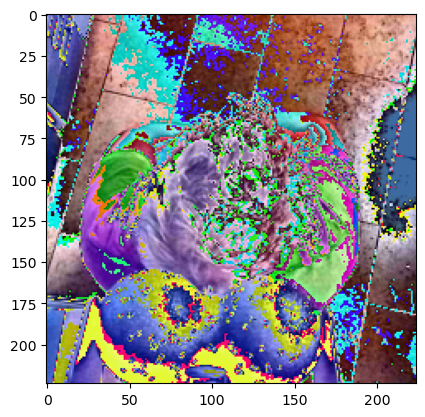

In [11]:
# Display a sample image
data, label = orig_set[100]
transform_test = T.ToPILImage()
plt.imshow(transform_test(data))

In [12]:
# Display classes and dataset length
print(orig_set.classes)
print(len(orig_set))

['duoballs', 'trigger']
4843


In [13]:
# DataLoader setup
data_loader = torch.utils.data.DataLoader(orig_set, batch_size=len(orig_set), shuffle=True)


In [14]:
# Define the dataset size
dataset_size = len(orig_set)

In [15]:
# Calculate the sizes for training, validation, and test sets
train_size = int(0.6 * dataset_size)
val_size = int(0.2 * dataset_size)
test_size = dataset_size - train_size - val_size

torch.Size([3, 224, 224])


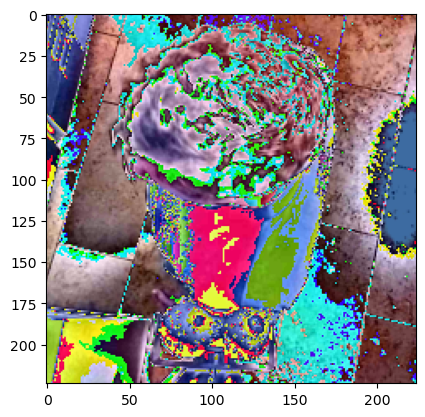

In [16]:
# Split the dataset into training, validation, and test sets
train_set, val_set, test_set = random_split(orig_set, [train_size, val_size, test_size])

val_data, val_label = val_set[1]
print(val_data.size())

transform = T.ToPILImage()
plt.imshow(transform(val_data))

In [17]:
# DataLoaders for training, validation, and test sets
train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=8,
    shuffle=True,
    num_workers=16
)

val_loader = torch.utils.data.DataLoader(
    val_set,
    batch_size=8,
    shuffle=True,
    num_workers=16
)

test_loader = torch.utils.data.DataLoader(
    test_set,
    batch_size=8,
    shuffle=True,
    num_workers=16
)

In [18]:
# Load the VGG16 model
model = models.vgg16(weights=VGG16_Weights.IMAGENET1K_V1)

# Modify the classifier (fully connected) layers for your specific classification task
num_features = model.classifier[6].in_features

# Define the new classifier
classifier = nn.Sequential(
    nn.Linear(num_features, 4096),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(4096, 4096),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(4096, 2)
)

# Replace the existing classifier
model.classifier[6] = classifier


In [19]:
# Modify the classifier (fully connected) layers for your specific classification task
#num_features = model.classifier[6].in_features
#features = list(model.classifier.children())[:-1]  # Remove the last layer
#features.extend([nn.Linear(num_features, 2)])  # Modify the number of output classes as needed
#model.classifier = nn.Sequential(*features)

In [20]:
# Display the modified model
print(model.classifier)

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Sequential(
    (0): Linear(in_features=4096, out_features=4096, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=4096, out_features=4096, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=4096, out_features=2, bias=True)
  )
)


In [21]:
# Device setup
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)


In [22]:
# Define loss function, optimizer, and learning rate scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
exp_lr_scheduler = StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
#Use framework
import sys
sys.path.append('C:/Users/chris/Documents/GitHub/tensionterminator/')
from framework.frameworktest_pyt import FrameworkLogger
from framework.main_func import main_train_func

input_args = [train_loader, val_loader, model, criterion, optimizer, exp_lr_scheduler, device]

# Modell trainieren
logger = FrameworkLogger(5, model, main_train_func, input_args, "primin_pytorch")
logger.train_model()
#logger.generate_statistics()

Epoch 0
Epoch: 0: Train: Loss: 0.1433 Acc: 0.8101 Val: Loss: 0.0755 Acc: 0.7397
{'loss': 0.14325194945554384, 'accuracy': 0.8100961446762085, 'val_loss': 0.07549635622619598, 'val_accuracy': 0.7396694214876033}
Epoch 0 took 2537.66 seconds
Epoch 1
Epoch: 1: Train: Loss: 0.0770 Acc: 0.7548 Val: Loss: 0.0760 Acc: 0.7397
{'loss': 0.07699570147279691, 'accuracy': 0.754807710647583, 'val_loss': 0.07596619775103143, 'val_accuracy': 0.7396694214876033}
Epoch 1 took 17450.13 seconds
Epoch 2
Epoch: 2: Train: Loss: 0.0718 Acc: 0.7572 Val: Loss: 0.0732 Acc: 0.7397
{'loss': 0.07184983353427314, 'accuracy': 0.7572115659713745, 'val_loss': 0.07320623843322609, 'val_accuracy': 0.7396694214876033}
Epoch 2 took 2025.48 seconds
Epoch 3


In [ ]:
def get_time():
    return datetime.datetime.now().strftime("%d_%m_%Y_%H_%M_%S")

In [ ]:
def model_save_path(timestamp: str):
    abs_path = os.getcwd()
    two_up =  path.abspath(path.join(abs_path ,"../.."))
    return path.join(two_up, 'models', f'{os.path.basename(abs_path)}', timestamp, f'model_{get_time()}.pt')

In [ ]:
model_save_path(input_dataset)

In [ ]:
save_path = model_save_path(input_dataset)

os.makedirs(os.path.dirname(save_path), exist_ok=True)

torch.save(model.state_dict(), save_path)

In [ ]:
# Test the model on the test set
num_correct = 0.0
for inputs, labels in test_loader:
    model.eval()
    inputs = inputs.to(device)
    labels = labels.to(device)
    predict_label = model(inputs)
    _, predicted = torch.max(predict_label, 1)
    num_correct += (predicted == labels).float().sum()
    
    
accuracy = num_correct / (len(test_loader) * test_loader.batch_size)
print("Test Accuracy: {:.4f}".format(accuracy))

In [ ]:
import matplotlib.pyplot as plt

def imshow(inp, title=None):
    inp = inp.numpy().transpose((1,2,0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.show()

def print_grid():
    inputs, classes = next(iter(test_loader))
    out = torchvision.utils.make_grid(inputs)
    class_names = orig_set.classes

    outputs = model(inputs.to(device))
    _, preds = torch.max(outputs, 1)

    imshow(out, title=[class_names[x] for x in preds])

print_grid()

In [33]:
# Training loop
start_time = time.time()
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() / inputs.size(0)
        running_corrects += torch.sum(preds == labels.data) / inputs.size(0)

    exp_lr_scheduler.step()
    train_epoch_loss = running_loss / len(train_loader)
    train_epoch_acc = running_corrects / len(train_loader)

    model.eval()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() / inputs.size(0)
        running_corrects += torch.sum(preds == labels.data) / inputs.size(0)

    epoch_loss = running_loss / len(val_loader)
    epoch_acc = running_corrects.double() / len(val_loader)
    print(f"Epoch: {epoch}: Train: Loss: {train_epoch_loss:.4f} Acc: {train_epoch_acc:.4f} Val: Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

end_time = time.time()
print("Time:", end_time - start_time)

Epoch: 0: Train: Loss: 0.6534 Acc: 0.7486 Val: Loss: 0.0710 Acc: 0.7459
Epoch: 1: Train: Loss: 0.0741 Acc: 0.7493 Val: Loss: 0.0709 Acc: 0.7459
Epoch: 2: Train: Loss: 0.0715 Acc: 0.7517 Val: Loss: 0.0711 Acc: 0.7459
Epoch: 3: Train: Loss: 0.0714 Acc: 0.7517 Val: Loss: 0.0709 Acc: 0.7459
Epoch: 4: Train: Loss: 0.0716 Acc: 0.7517 Val: Loss: 0.0710 Acc: 0.7459
Time: 8500.329993247986
